[2021-07-12 16:26:17,655] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-12 16:26:17,655] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-12 16:26:17,655] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-12 16:26:17,655] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-07-12 16:26:17,659] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res35/Eplus-env-sub_run1
[2021-07-12 16:26:17,659] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simulations/Eplus-env-Eplus-test-v4-res35/Eplus-env-sub_run1
[2021-07-12 16:26:17,659] EPLUS_ENV_Eplus-test-v4_MainThread_ROOT INFO:EnergyPlus working directory is in /home/abdalla/Desktop/QSIURP/Simul

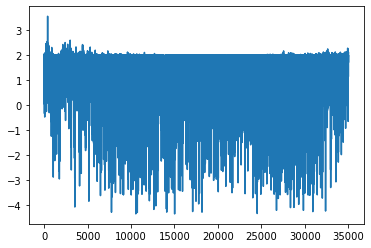

In [4]:
import gym;
import eplus_env;
import random
import statistics
import matplotlib.pyplot as plt

def normalize(raw_list,x_max,x_min):
  norm_list = []

  for i in range(len(raw_list)):
    x = raw_list[i]

    if x < x_min:
      x = x_min
    elif x > x_max:
      x = x_max

    x_norm = (x_max - x) / (x_max - x_min)
    norm_list.append(x_norm)

  return norm_list

def cubic(x, scale = - 0.1, translation = 0):
  return translation + (x**3) * scale

def cubicise(energy,max_e,min_e,temp,max_t,min_t):
  a = 0.5
  energy_temp = []
  energy_norm = normalize(energy,max_e,min_e)
  #plt.plot(energy_norm) 
  temp_norm = normalize(temp,max_t,min_t)
  #plt.plot(temp_norm) 
  for i in range(len(temp)):
    #energy_i = cubic(energy_norm[i],scale= -0.1,translation=2)
    #temp_i = cubic(temp_norm[i],scale= -0.1,translation=2)
    r = a * energy_norm[i] + (1 - a) * temp_norm[i]
    R = cubic(8 * r - 4,scale= -0.1,translation=2)
    energy_temp.append(R)
    #energy_temp.append([energy_i,temp_i])

  return energy_temp

def simulate(sp,max_e,min_e,max_t,min_t):
  
  #freqTable = getFreqTable(inTemps,outTemps)
  env = gym.make('Eplus-test-v4')

  # Number of episodes
  for i in range(1):
    energyCList = []
    deltaTemp = []

    # Reset the env (creat the EnergyPlus subprocess)
    curSimTime, ob, isTerminal = env.reset()
    
    # get the initial in/out temps and the energy consumption
    state = (round(ob[8]),round(ob[0]))
    energyC = ob[14] # ???

    while not isTerminal:
      
      choice = random.randint(0,35)
      action = [choice,choice]
      
      curSimTime, ob, isTerminal = env.step(action)
      nextState = (round(ob[8]),round(ob[0]))
      deltaTemp.append(abs(sp - round(ob[8])))

      # get the energy consumption for the last 15 mins
      energyC = abs(energyC - ob[14])
      energyCList.append(energyC)

      state = nextState
      # ate next ate (زي المفجوع)
  
    #if (i % 10 == 0):
    #  print (f"max_e = {max(energyCList)} \n min_e = {min(energyCList)}")
    #  print (f"max_t = {max(deltaTemp)} \n min_t = {min(deltaTemp)}")
    #  energyCList = []
    #  deltaTemp = []

    
  
  finalList = cubicise(energyCList,max_e,min_e,deltaTemp,max_t,min_t)
  plt.plot(finalList) 

# Safe termination of the environment after use.
  env.end_env()


simulate(30,11000,0,24,0)

# u late i u ate


# 0.00575025890498182 11302.030894529009 2982.80613622848 0 26